<img src="https://www.peoplecert.org/-/media/peoplecert/images/tc-images/peoplelogy-skill/peopleogy-logo.png?h=966&iar=0&w=2231&hash=28DD04BA69030200BD7ADEA1370449B3" style="float: left; margin: 20px; height: 55px">

# Time Series Analysis (EDA)

_Author: Fahmi Roslan_

---

## Capstone Project Title : Forecasting Market Volatility for GBP/USD Using Time Series

---

### Data Processing Process
 
- Importing data.  
- Drop and remove unnecessary columns and rows .
- Concoatig date and time.
- Converting object and sorting index.


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 

In [8]:
# Load data 
df = pd.read_csv('gbpusd.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,2000.01.03,1.6146,1.6400,1.6138,1.6361,4444
1,2000.01.04,1.6359,1.6415,1.6310,1.6373,6141
2,2000.01.05,1.6376,1.6450,1.6354,1.6419,6504
3,2000.01.06,1.6421,1.6511,1.6411,1.6470,6473
4,2000.01.07,1.6476,1.6499,1.6360,1.6394,4754


In [9]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [10]:
# Change date column to be datetime dtype
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Set Date to be in the index
df.set_index('Date', inplace=True)

In [12]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,1.6146,1.6400,1.6138,1.6361,4444
2000-01-04,1.6359,1.6415,1.6310,1.6373,6141
2000-01-05,1.6376,1.6450,1.6354,1.6419,6504
2000-01-06,1.6421,1.6511,1.6411,1.6470,6473
2000-01-07,1.6476,1.6499,1.6360,1.6394,4754


In [14]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

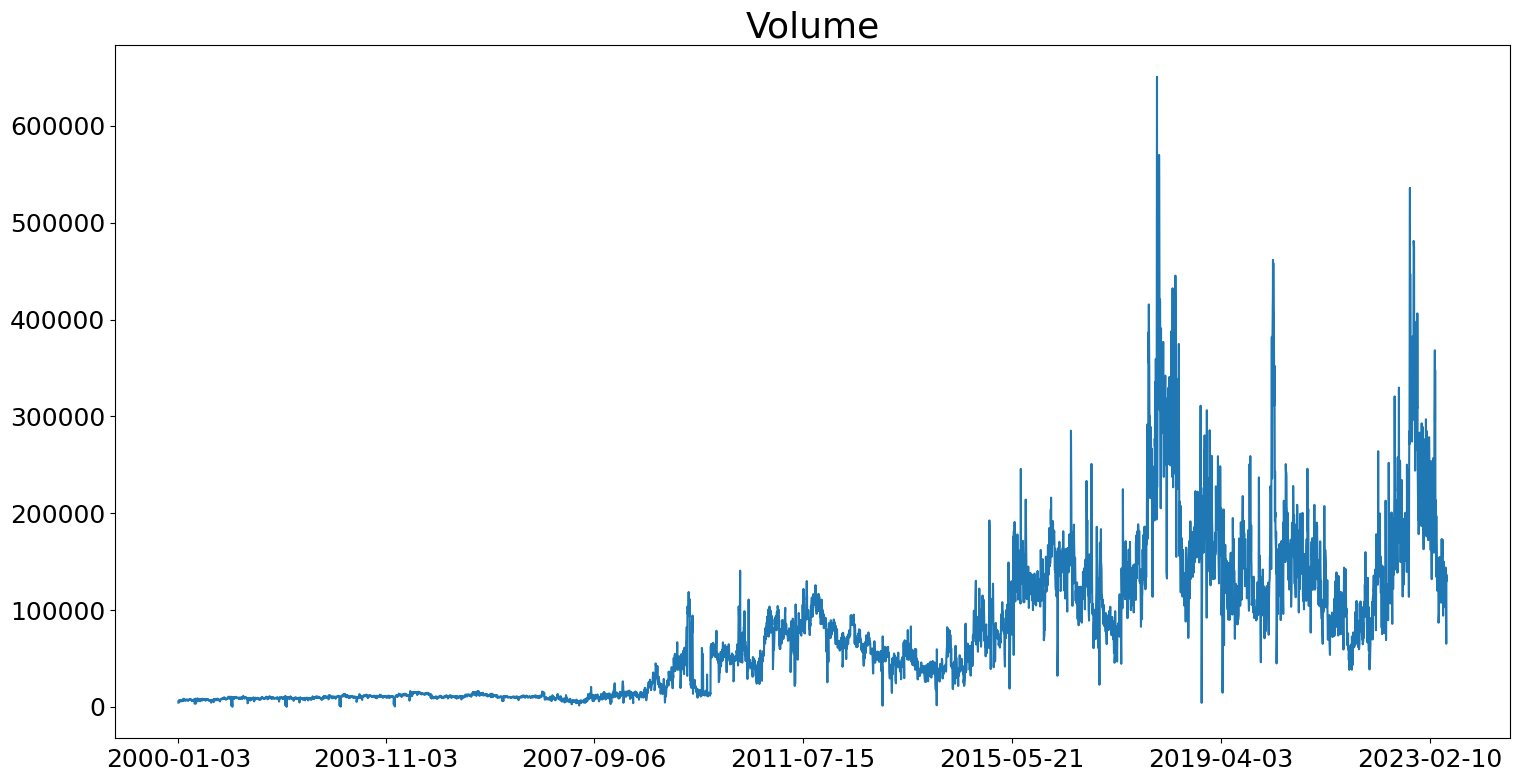

In [15]:
# Generate a time plot of our data.
plot_series(df, ['Volume'], title = "Volume", steps=1000)

Text(0.5, 1.0, 'Cumulative Returns')

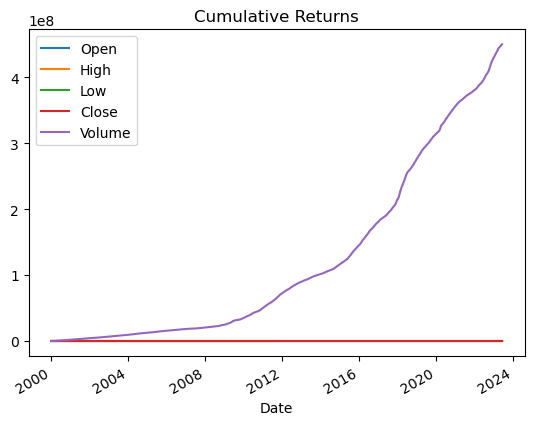

In [17]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('Cumulative Returns')

Text(0.5, 1.0, 'Autocorrelation plot')

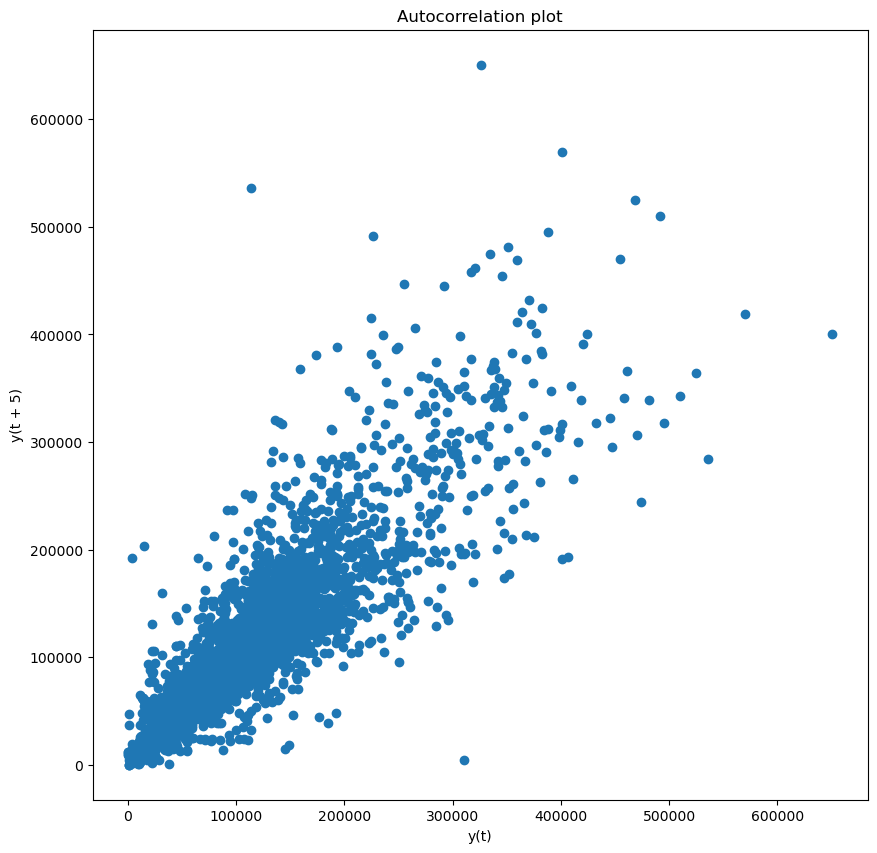

In [27]:
plt.figure(figsize=(10,10))
lag_plot(df['Volume'], lag=5)
plt.title('Autocorrelation plot')

### Checking for Stationarity: the Augmented Dickey-Fuller Test

The [augmented Dickey-Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) is a hypothesis test that tests for stationarity. We assume that our data are not stationary. With enough evidence, we may accept that our data are stationary.

Specifically, the test is as follows:

$$
\begin{eqnarray}
&H_0:& \text{not stationary} \\
&H_A:& \text{stationary}
\end{eqnarray}
$$

In [28]:
# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller

# Run ADF test on original (non-differenced!) data.

adfuller(df['Volume'])

(-2.943655895014861,
 0.0405018542219686,
 34,
 6044,
 {'1%': -3.4314324089136767,
  '5%': -2.8620183258811283,
  '10%': -2.567024610317412},
 137339.01168246148)

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

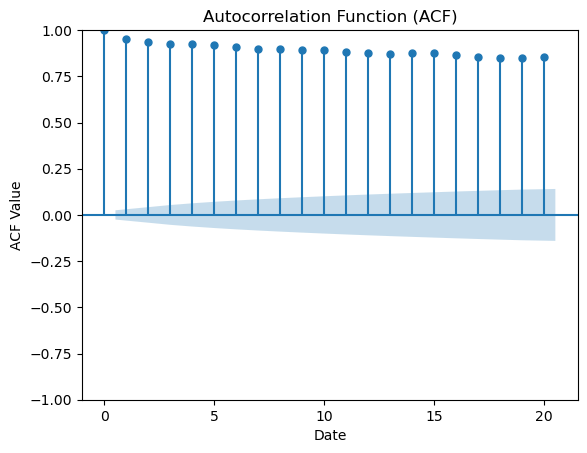

In [31]:
plot_acf(df['Volume'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Date")
plt.ylabel("ACF Value")
plt.show()

In [33]:
adftest = adfuller(df['Volume'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")


ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -4.98508786642851
P-Value: 0.00021900586024936348
Number of lags: 34
Number of observations: 6044
Critical Values: {'1%': -3.9602686444705624, '5%': -3.4112166539176876, '10%': -3.12747790370897}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


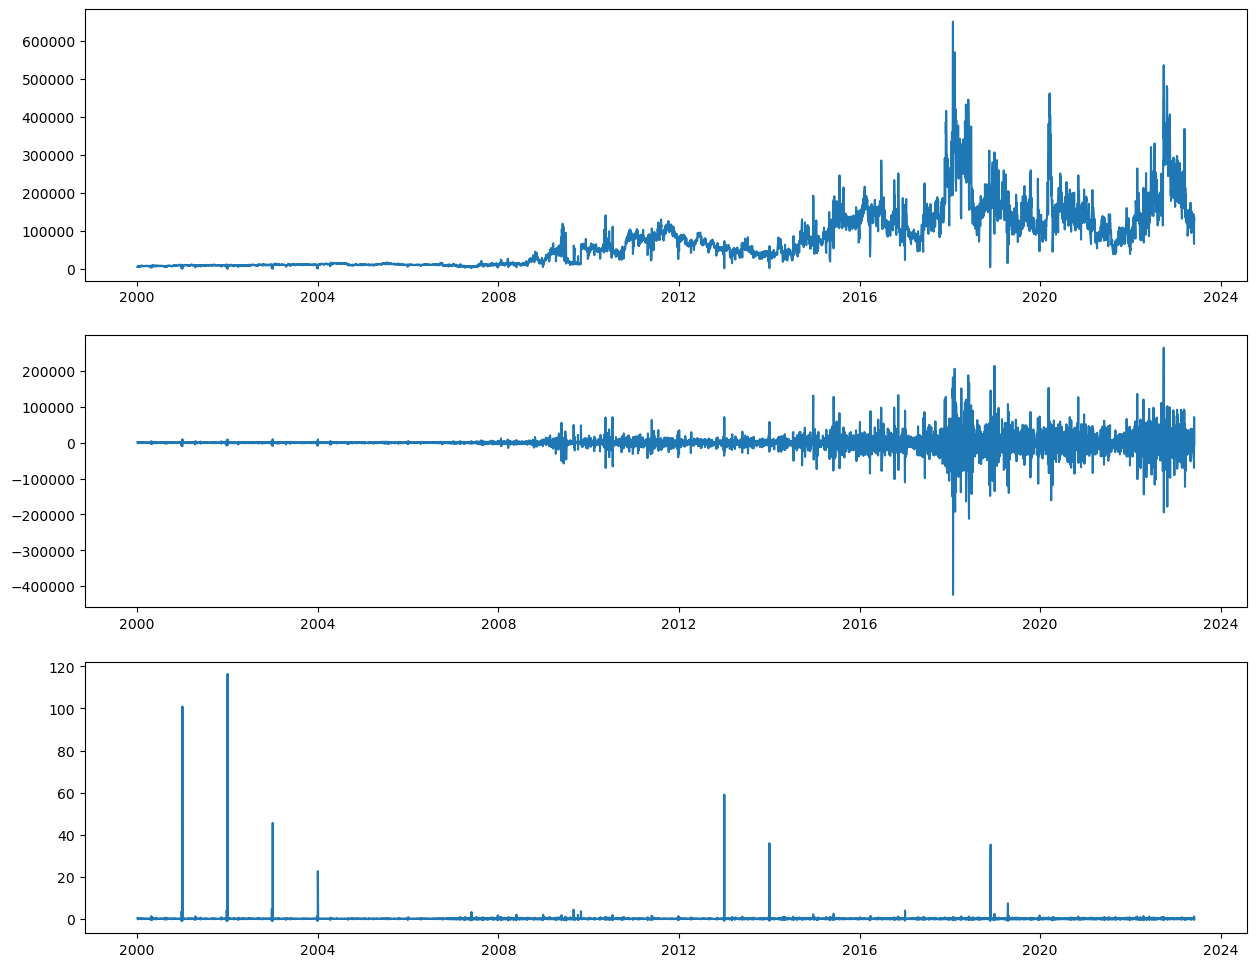

In [34]:
fig, axes = plt.subplots(nrows=3, figsize=(15,12))
axes[0].plot(df['Volume'])
axes[1].plot(df['Volume'].diff())
axes[2].plot(df['Volume'].pct_change())

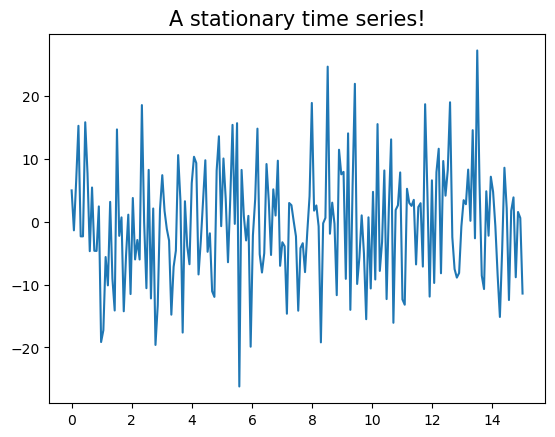

In [35]:
# Set seed.
np.random.seed(42)

# Generate 200 steps in time from 0 to 15.
t = np.linspace(0, 15, 200)

# Generate a white noise process with Normally distributed noise.
y = 5 * np.random.normal(0, 2, 200)

# Generate plot.
plt.title('A stationary time series!', fontsize=15)
plt.plot(t, y);

## ARIMA Model

In order to fit an ARIMA model, we need to specify three parameters: $p$, $d$, and $q$.
- We've already described how we'll find values of $p$ and $q$!

### Parameter $d$: How much do we difference?

$d$ is known as the **differencing parameter**. This controls how much we "difference" our time series by. _(We difference to meet an assumption - we'll talk about this in a minute!)_

Differencing our time series means that instead of fitting a model that predicts our time series $Y_t$ directly, we'll fit a model to $Y'_t$ or $Y''_t$:

$$
\begin{eqnarray*}
Y'_t &=& Y_t - Y_{t-1} \\
Y''_t &=& Y'_t - Y'_{t-1} = Y_t - 2Y_{t-1} + Y_{t-2}
\end{eqnarray*}
$$

So if I wanted to fit a model, my "new" output variable I'm trying to predict would be $Y'_t$ or $Y''_t$.

### Type of ARIMA Model

- ARIMA   : Non-seasonal Autoregressive Intergrated Moving Average
- SARIMA  : Seasonal ARIMA
- SARIMAX : Seasonal ARIMA with exogennous variables

### Value of 'p-d-q'in ARIMA Model

- p is the number of autoregressive terms
- d is the number og non seasonal difference
- q is the number of lagged forecast errors in the prediction equation

### Finding the value of the d parameter

<Axes: xlabel='Date'>

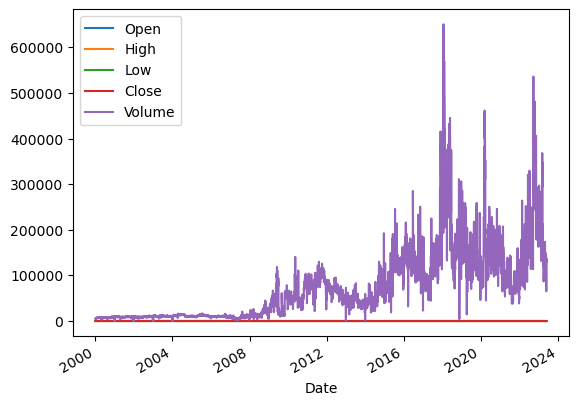

In [75]:
df.plot()

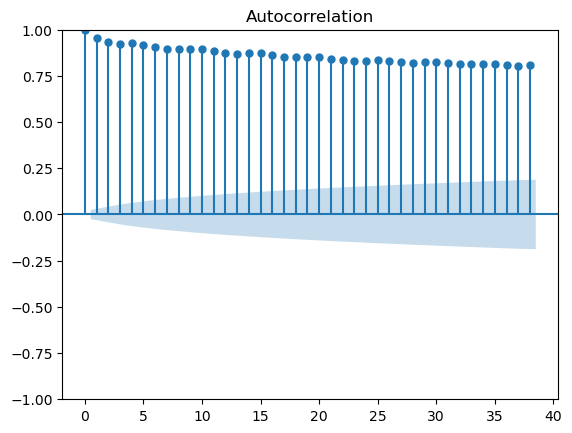

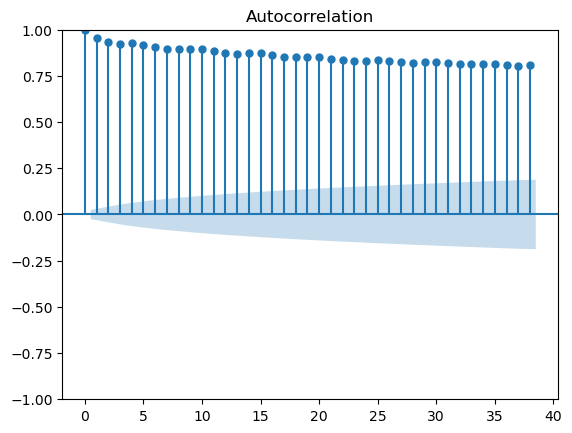

In [50]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Volume'])

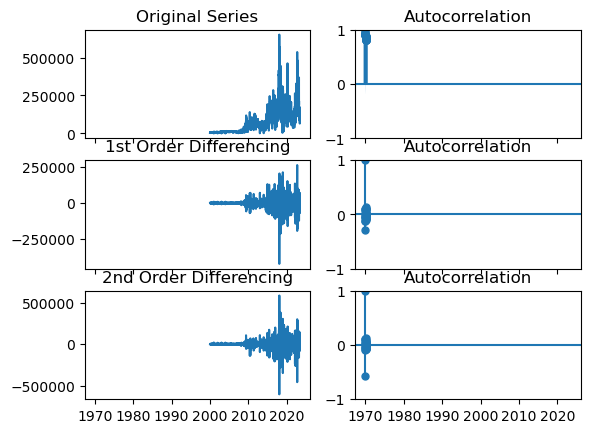

In [63]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Volume']); axes[0, 0].set_title('Original Series')
plot_acf(df['Volume'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Volume'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Volume'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Volume'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Volume'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


### Building ARIMA Model

In [82]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [83]:
# Run ADF test on original (non-differenced!) data.
# Run ADF test on original (non-differenced!) data.

interpret_dftest(adfuller(df['Volume']))

Test Statistic   -2.943656
p-value           0.040502
dtype: float64

### Fit an ARIMA model.

There are three hyperparameters we need to get values for when fitting an ARIMA model.
1. Determine a value of $d$ using the Augmented Dickey-Fuller test.
2. Then, determine values of $p$ and $q$ through GridSearching.

An $ARIMA(p, d, q)$ model is specified by:
- how many differences $d$ we need to calculate in order to achieve stationarity.
- how many lags $p$ we regress $Y_t^{(d)}$ on.
- how many errors $q$ we regress $Y_t^{(d)}$ on.

<details><summary>Check: Recall that $AR$ incorporates information from long-term trends and $MA$ incorporates information from sudden shocks. What are some examples where we might see both long-term trends and sudden fluctuations in our time series data? </summary>

- Stock price data. Stocks increase and decrease over time, but news or other stock changes may have sudden effects on prices. (Similar logic applies to gas or oil prices.)
- Public transportation ridership. While public transportation may see slow changes over time, marketing campaigns, changes in price, or accidents may have a sudden, unforeseen shock on ridership.
- Temperature data over time!
</details>

Depending on our values of $p$, $d$, and $q$, we might refer to these models by slightly different names.

- If $d=0$ and $q=0$, an AR(p) model is specified by how many lags $p$ we regress $Y_t$ on.
- If $d=0$ and $p=0$, an MA(q) model is specified by how many errors $q$ we regress $Y_t$ on.
- If $d=0$, an ARMA(p, q) model is specified by how many lags $p$ and how many errors $q$ we regress $Y_t$ on.

| p | d | q |          Model         |
|:-:|:-:|:-:|:----------------------:|
| 1 | 0 | 0 |  ARIMA(1,0,0) = AR(1)  |
| 0 | 0 | 1 |  ARIMA(0,0,1) = MA(1)  |
| 1 | 0 | 1 | ARIMA(1,0,1) = ARMA(1,1) |
| 1 | 1 | 1 |      ARIMA(1,1,1)      |
| 1 | 1 | 0 |      ARIMA(1,1,0)      |
| 0 | 1 | 1 |      ARIMA(0,1,1)      |
